# ROF Denoising Demo
In this demo we will illustrate the process of image denoising of the ROF model.
$$
\min_{u} \frac{1}{2}\|u-f\|^2+\lambda\sum_{j=1}^n\|(\mathbb{K}u)_j\|
$$

In [1]:
using Pkg, Random, Images, TestImages, LinearAlgebra
using AbstractOperators
using StructuredOptimization

┌ Info: Recompiling stale cache file /Users/dvillacis/.julia/compiled/v1.2/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1240


In [2]:
include("../BilevelImagingParameterLearning.jl")
using .BilevelImagingParameterLearning

In [3]:
Random.seed!(123); # For reproductibility

┌ Info: Recompiling stale cache file /Users/dvillacis/.julia/compiled/v1.2/QuartzImageIO/n8vDP.ji for QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1240


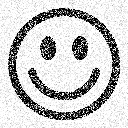

In [4]:
Y = datasetimage("1_smiley_noisy","../datasets/smiley_dataset")
Y[Y .< 0] .= 0. # Make sure pixels are in range
Y[Y .> 1] .= 1.
Gray.(Y)

In [20]:
Xgt = testimage("cameraman")
Y = Xgt .+ sqrt(0.006*norm(Xgt,Inf))*randn(size(Xgt)) # Add noise
Y[Y .< 0] .= 0. # Make sure pixels are in range
Y[Y .> 1] .= 1.
Gray.(Y)
typeof(Y)

Array{Float64,2}

In [11]:
V = Variation(size(Y)) # Define the finite differences gradient operator
U = Variable(size(V,1)...)
lambda = 0.15
Y = float(Y);

In [12]:
@time begin
@minimize ls(-V'*U+Y) + conj(lambda*norm(U,2,1,2)) with ForwardBackward(tol = 1e-3, gamma = 1/8, fast = true) # Minimizing the dual formulation
end

  0.343145 seconds (1.50 k allocations: 88.055 MiB, 4.81% gc time)


((Variable(Float64, (16384, 2)),), 226)

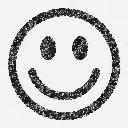

In [13]:
X = Gray.(-V'*(~U)+Y)